# Importing lib

In [1]:
import pandas as pd
import numpy as np         
import seaborn as sns

# loading dataset

In [2]:
Columns=['Hours','Calories', 'Weight']
DataValues=[[ 1.0, 2500, 95],
 [ 2.0, 2000, 85],
 [ 2.5, 1900, 83],
 [ 3.0, 1850, 81],
 [ 3.5, 1600, 80],
 [ 4.0, 1500, 78],
 [ 5.0, 1500, 77],
 [ 5.5, 1600, 80],
 [ 6.0, 1700, 75]]

In [3]:
Columns

['Hours', 'Calories', 'Weight']

In [4]:
DataValues

[[1.0, 2500, 95],
 [2.0, 2000, 85],
 [2.5, 1900, 83],
 [3.0, 1850, 81],
 [3.5, 1600, 80],
 [4.0, 1500, 78],
 [5.0, 1500, 77],
 [5.5, 1600, 80],
 [6.0, 1700, 75]]

In [6]:
GymData=pd.DataFrame(data=DataValues,columns=Columns)
GymData

,Hours,Calories,Weight
0,1.0,2500,95
1,2.0,2000,85
2,2.5,1900,83
3,3.0,1850,81
4,3.5,1600,80
5,4.0,1500,78
6,5.0,1500,77
7,5.5,1600,80
8,6.0,1700,75


# EDA

In [7]:
GymData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Hours     9 non-null      float64
 1   Calories  9 non-null      int64  
 2   Weight    9 non-null      int64  
dtypes: float64(1), int64(2)
memory usage: 344.0 bytes


In [8]:
GymData.isnull().sum()

Hours       0
Calories    0
Weight      0
dtype: int64

In [9]:
GymData.describe()

,Hours,Calories,Weight
count,9.000000,9.000000,9.000000
mean,3.611111,1794.444444,81.555556
std,1.672905,318.634238,5.876034
min,1.000000,1500.000000,75.000000
25%,2.500000,1600.000000,78.000000
50%,3.500000,1700.000000,80.000000
75%,5.000000,1900.000000,83.000000
max,6.000000,2500.000000,95.000000


<AxesSubplot:>

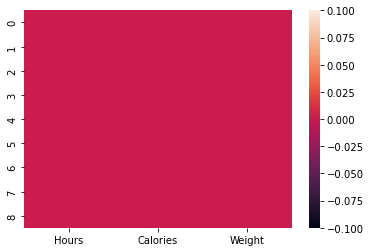

In [10]:
sns.heatmap(GymData.isnull())

- heatmap is a graphical representation of data that uses a system of color coding to represent different values.


In [11]:
GymData.dtypes

Hours       float64
Calories      int64
Weight        int64
dtype: object

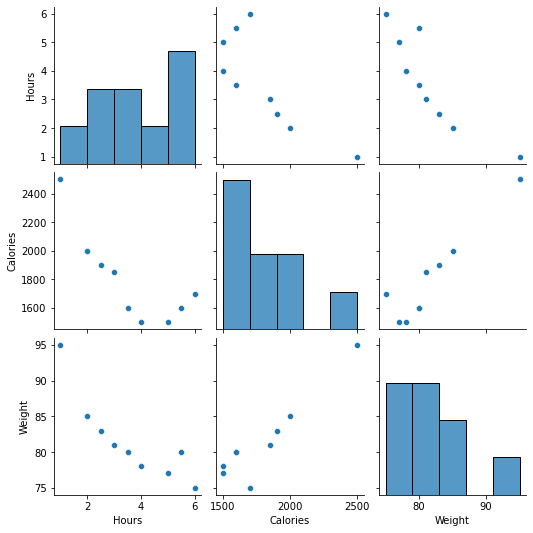

In [13]:
import matplotlib.pyplot as plt
sns.pairplot(GymData,kind = 'scatter' )
plt.show()

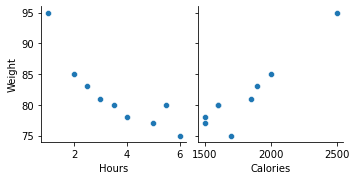

In [14]:
#to plot all the scatterplots in a single plot
import seaborn as sns
sns.pairplot(GymData, x_vars=[ 'Hours', 'Calories'], y_vars = 'Weight', kind="scatter")

In [18]:
GymData.corr()

,Hours,Calories,Weight
Hours,1.000000,-0.811155,-0.901087
Calories,-0.811155,1.000000,0.904421
Weight,-0.901087,0.904421,1.000000


<AxesSubplot:>

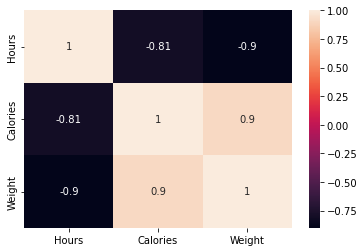

In [17]:
sns.heatmap( GymData.corr(), annot = True )

In [17]:
GymData["Hours"].value_counts()

1.0    1
2.0    1
2.5    1
3.0    1
3.5    1
4.0    1
5.0    1
5.5    1
6.0    1
Name: Hours, dtype: int64

# Divding the data into x and y

In [18]:
x=GymData[["Hours","Calories"]]
x

,Hours,Calories
0,1.0,2500
1,2.0,2000
2,2.5,1900
3,3.0,1850
4,3.5,1600
5,4.0,1500
6,5.0,1500
7,5.5,1600
8,6.0,1700


In [19]:
y=GymData['Weight']
y

0    95
1    85
2    83
3    81
4    80
5    78
6    77
7    80
8    75
Name: Weight, dtype: int64

# Spliting data into train and test

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=42)

# Model loading and fitting

In [21]:
from sklearn.linear_model import LinearRegression
Reg_model=LinearRegression()
Reg_model.fit(X_train,y_train)

LinearRegression()

In [22]:
Reg_model.fit(X_train,y_train)
y_pred=Reg_model.predict(X_test)

# Evaluation

In [23]:
from sklearn import metrics
print("R2 score for training:",metrics.r2_score(y_train,Reg_model.predict(X_train)))
print("R2 score for testing:",metrics.r2_score(y_test,y_pred))

def adj_r2(x,y):
    r2 = Reg_model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
#     print(p)
#     print(n)
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

aj_train=adj_r2(X_train,y_train)
print("Adj score for training:",aj_train)

aj_test=adj_r2(X_test,y_test)
print("adj score for testing:",aj_test)

print("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("MAPE:",metrics.mean_absolute_percentage_error(y_test,y_pred))
print("rmse:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R2 score for training: 0.9564258337676882
R2 score for testing: 0.11582121418818891
Adj score for training: 0.9273763896128137
adj score for testing: -inf
MSE: 7.662882810369029
MAE: 2.2573527945604326
MAPE: 0.027989320855841965
rmse: 2.7681912524912415


C:\Users\DELL\AppData\Local\Temp\ipykernel_956\674175417.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)


In [ ]:
import warnings 

In [25]:
print('Accuracy of the model,',100- (np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

print('Accuracy of the model',100- (np.median(np.abs((y_test - y_pred) / y_test)) * 100))

Accuracy of the model, 97.2010679144158
Accuracy of the model 98.4317478860899


# Results visulization

/Users/ashishkhedkar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/ashishkhedkar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

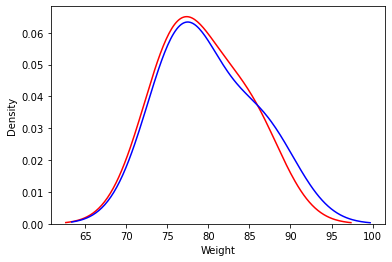

In [30]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

/Users/ashishkhedkar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

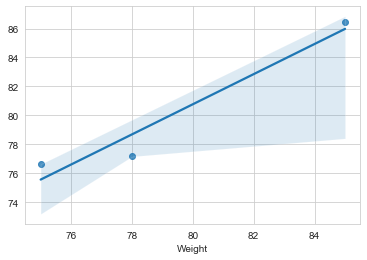

In [31]:
sns.set_style("whitegrid")
sns.regplot(y_test,y_pred)

# End to end function

In [32]:
def Linear_regression_evalution(x,y):
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    Linear_reg=LinearRegression()
    from sklearn import metrics
    import matplotlib.pyplot as plt
    import warnings 
    warnings.filterwarnings("ignore")
    import pandas as pd
    import seaborn as sns
    import numpy as np
    
    #splitting into test train
    x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
    
    #Model fitting
    Linear_reg.fit(x_train,y_train)
    
    #Evalution
    y_pred_test=Linear_reg.predict(x_test)
    
    #R2
    r2_training=metrics.r2_score(y_train,Linear_reg.predict(x_train))
    r2_testing=metrics.r2_score(y_test,Linear_reg.predict(x_test))
    
    #adjusted r2                           
    n_train=x_train.shape[0]
    p_train=x_train.shape[1]                            
    adjusted_r2_training = 1-(1-r2_training)*(n_train-1)/(n_train-p_train-1)
    
    n_test=x_test.shape[0]
    p_test=x_test.shape[1] 
    adjusted_r2_testing = 1-(1-r2_testing)*(n_test-1)/(n_test-p_test-1)
    
    MSE=metrics.mean_squared_error(y_test,y_pred_test)
    MAE=metrics.mean_absolute_error(y_test,y_pred_test)
    MAPE=metrics.mean_absolute_percentage_error(y_test,y_pred_test)
    RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
    MAPE_new=100-(metrics.mean_absolute_percentage_error(y_test,y_pred_test)*100)
    
    #Making final ans in dataframe
    values=np.array([[r2_training],[adjusted_r2_training],[r2_testing],[adjusted_r2_testing],[MSE],[MAE],[MAPE_new],[RMSE]])
    index1=["R2 score Training","Adjusted R2 score training","R2 score Testing","Adjusted R2 score testing","MSE","MAE"
           ,"Accuracy in % (MAPE)","RMSE"]
    print(type(values))
    
    ans=pd.DataFrame(data=values,index=index1,columns=["Values"],dtype="float")  
    pd.set_option('display.float_format', '{:.4f}'.format)

    
    return ans

ans=Linear_regression_evalution(X,y)
ans

<class 'numpy.ndarray'>


,Values
R2 score Training,0.8946
Adjusted R2 score training,0.8419
R2 score Testing,0.8973
Adjusted R2 score testing,-inf
MSE,1.8028
MAE,1.2992
Accuracy in % (MAPE),98.3568
RMSE,1.3427


In [33]:
df=pd.DataFrame()
df["Col_name"]=X_train.columns
df["coff_values"]=pd.Series(Reg_model.coef_)
df

,Col_name,coff_values
0,Hours,-1.5141
1,Calories,0.0125


In [34]:
Reg_model.intercept_

64.51236749116609